In [218]:
import pandas as pd
import numpy as np
import json
from dictor import dictor
from tabulate import tabulate

In [74]:
path_json = "../data/parsed_baseline_v3_dropout_0_25_E_10/results.json"

In [7]:
with open(path_json) as f:
    results = json.load(f)

In [56]:
progress = dictor(results, '_checkpoint.progress')

In [156]:
def prettify_json(path):
    with open(path) as fd:
        json_dict = json.load(fd)

    if not json_dict:
        print('[Error] The file [{}] could not be parsed.'.format(args.file))
        return -1

    progress = dictor(json_dict, '_checkpoint.progress')
    records_table = dictor(json_dict, '_checkpoint.records')
    sensors = dictor(json_dict, 'sensors')
    labels_scores = dictor(json_dict, 'labels')
    scores = dictor(json_dict, 'values')

    # compose output
    output = ""

    if progress:
        output += '* {}% ({}/{}) routes completed\n'.format(100.0*progress[0]/float(progress[1]),
                                                            progress[0],
                                                            progress[1])
    if sensors:
        output += '* The agent used the following sensors: {}\n\n'.format(', '.join(sensors))

    if scores and labels_scores:
        metrics = [labels_scores[0:3], scores[0:3]]
        infractions = [labels_scores[3:], scores[3:]]

    if records_table:
        header = ['route', 'metric', 'value', 'additional information']
        list_statistics = [header]
        total_duration_game = 0
        total_duration_system = 0
        total_route_length = 0
        for route in records_table:
            route_completed_kms = 0.01 * route['scores']['score_route'] * route['meta']['route_length'] / 1000.0
            metrics_route = [['{}'.format(route['route_id'])] + [key, '{:.3f}'.format(values), ''] for key, values in route['scores'].items()]
            infractions_route = [['{}'.format(route['route_id'])] + [key, '{:.3f} ({} occurrences)'.format(len(values)/route_completed_kms, len(values)),
                                 '\n'.join(values)] for key, values in route['infractions'].items()]

            times = [['{}'.format(route['route_id'])] + ['duration game', '{:.3f}'.format(route['meta']['duration_game']), 'seconds'],
                     ['{}'.format(route['route_id'])] + ['duration system', '{:.3f}'.format(route['meta']['duration_system']), 'seconds']]

            route_completed_length = [['{}'.format(route['route_id'])] + ['distance driven', '{:.3f}'.format(route_completed_kms), 'Km']]

            total_duration_game += route['meta']['duration_game']
            total_duration_system += route['meta']['duration_system']
            total_route_length += route_completed_kms

            list_statistics.extend([ *metrics_route, *infractions_route, *times, *route_completed_length])

        header = ['total duration_game [s]', 'total duration_system [s]', 'total distance driven [Km]']
        total_stats = [header]
        total_stats.append(['{:.3f}'.format(total_duration_game), '{:.3f}'.format(total_duration_system), '{:.3f}'.format(total_route_length)])

    df_metrics_avg = pd.DataFrame(metrics[1:], columns=metrics[0])
    df_infractions = pd.DataFrame(infractions[1:], columns=infractions[0])
    df_metrics_routes = pd.DataFrame(list_statistics[1:], columns=list_statistics[0])
    df_routes_tot_stats = pd.DataFrame(total_stats[1:], columns=total_stats[0])
    
    # return metrics, infractions, list_statistics, total_stats
    return df_metrics_avg, df_infractions, df_metrics_routes, df_routes_tot_stats


In [232]:
def prettify_json(path):
    with open(path) as fd:
        json_dict = json.load(fd)

    if not json_dict:
        print('[Error] The file [{}] could not be parsed.'.format(args.file))
        return -1

    progress = dictor(json_dict, '_checkpoint.progress')
    records_table = dictor(json_dict, '_checkpoint.records')
    sensors = dictor(json_dict, 'sensors')
    labels_scores = dictor(json_dict, 'labels')
    scores = dictor(json_dict, 'values')

    # compose output
    output = ""

    if progress:
        output += '* {}% ({}/{}) routes completed\n'.format(100.0*progress[0]/float(progress[1]),
                                                            progress[0],
                                                            progress[1])
    if sensors:
        output += '* The agent used the following sensors: {}\n\n'.format(', '.join(sensors))

    if scores and labels_scores:
        metrics = [labels_scores[0:3], scores[0:3]]
        infractions = [labels_scores[3:], scores[3:]]

    if records_table:
        header = ['route', 'metric', 'value', 'occurrences', 'additional information']
        list_statistics = [header]
        total_duration_game = 0
        total_duration_system = 0
        total_route_length = 0
        for route in records_table:
            route_completed_kms = 0.01 * route['scores']['score_route'] * route['meta']['route_length'] / 1000.0
            metrics_route = [['{}'.format(route['route_id'])] + [key, '{:.3f}'.format(values), np.NAN, ''] for key, values in route['scores'].items()]
            infractions_route = [['{}'.format(route['route_id'])] + [key, round(len(values)/route_completed_kms, 3), len(values),
                                 '\n'.join(values)] for key, values in route['infractions'].items()]

            times = [['{}'.format(route['route_id'])] + ['duration game', '{:.3f}'.format(route['meta']['duration_game']), np.NAN, 'seconds'],
                     ['{}'.format(route['route_id'])] + ['duration system', '{:.3f}'.format(route['meta']['duration_system']), np.NAN, 'seconds']]

            route_completed_length = [['{}'.format(route['route_id'])] + ['distance driven', '{:.3f}'.format(route_completed_kms), np.NAN, 'Km']]

            total_duration_game += route['meta']['duration_game']
            total_duration_system += route['meta']['duration_system']
            total_route_length += route_completed_kms

            list_statistics.extend([*metrics_route, *infractions_route, *times, *route_completed_length])

        header = ['total duration_game [s]', 'total duration_system [s]', 'total distance driven [Km]']
        total_stats = [header]
        total_stats.append(['{:.3f}'.format(total_duration_game), '{:.3f}'.format(total_duration_system), '{:.3f}'.format(total_route_length)])

    df_metrics_avg = pd.DataFrame(metrics[1:], columns=metrics[0]).astype("float32")
    df_infractions = pd.DataFrame(infractions[1:], columns=infractions[0]).astype("float32")
    df_metrics_routes = pd.DataFrame(list_statistics[1:], columns=list_statistics[0]).astype({"value": "float32", "occurrences": "float32"})
    df_routes_tot_stats = pd.DataFrame(total_stats[1:], columns=total_stats[0]).astype("float32")
    
    #return metrics, infractions, list_statistics, total_stats
    return df_metrics_avg, df_infractions, df_metrics_routes, df_routes_tot_stats

In [233]:
#metrics, infractions, list_statistics, total_stats = prettify_json(path_json)
df_metrics_avg, df_infractions, df_metrics_routes, df_routes_tot_stats = prettify_json(path_json)

In [239]:
df_metrics_avg

,Avg. driving score,Avg. route completion,Avg. infraction penalty
0,11.949,30.649,0.473


In [224]:
df_infractions

,Collisions with pedestrians,Collisions with vehicles,Collisions with layout,Red lights infractions,Stop sign infractions,Off-road infractions,Route deviations,Route timeouts,Agent blocked
0,0.000,3.200,0.478,0.436,0.125,0.682,0.303,0.000,3.514


In [225]:
df_metrics_routes[df_metrics_routes.route == "RouteScenario_0"]

,route,metric,value,occurrences,additional information
0,RouteScenario_0,score_composed,23.271999,NaN,
1,RouteScenario_0,score_penalty,0.420000,NaN,
2,RouteScenario_0,score_route,55.409000,NaN,
3,RouteScenario_0,collisions_layout,0.000000,0.0,
4,RouteScenario_0,collisions_pedestrian,0.000000,0.0,
5,RouteScenario_0,collisions_vehicle,1.597000,1.0,Agent collided against object with type=vehicl...
6,RouteScenario_0,outside_route_lanes,0.000000,0.0,
7,RouteScenario_0,red_light,1.597000,1.0,"Agent ran a red light 100 at (x=332.04, y=316...."
8,RouteScenario_0,route_dev,0.000000,0.0,
9,RouteScenario_0,route_timeout,0.000000,0.0,


In [238]:
df_metrics_routes.groupby("metric")["value"].mean()

metric
collisions_layout          1.327722
collisions_pedestrian      0.000000
collisions_vehicle         8.888000
distance driven            0.403139
duration game            313.743042
duration system          945.983154
outside_route_lanes        1.895750
red_light                  1.209833
route_dev                  0.841750
route_timeout              0.000000
score_composed            11.948667
score_penalty              0.472972
score_route               30.649252
stop_infraction            0.348083
vehicle_blocked            9.760611
Name: value, dtype: float32

In [211]:
df_metrics_routes[df_metrics_routes.metric == "score_penalty"]["value"].std()

0.32486492

In [210]:
df_metrics_routes[df_metrics_routes.metric == "score_penalty"]["value"]

1      0.420
16     0.172
31     0.637
46     0.001
61     0.649
76     0.700
91     0.002
106    0.360
121    0.054
136    0.000
151    0.372
166    0.002
181    1.000
196    0.650
211    0.512
226    0.800
241    0.354
256    0.288
271    0.490
286    0.650
301    0.047
316    0.389
331    1.000
346    1.000
361    0.252
376    0.305
391    0.389
406    0.800
421    0.213
436    0.176
451    0.420
466    1.000
481    0.490
496    1.000
511    0.978
526    0.455
Name: value, dtype: float32

<AxesSubplot: ylabel='Frequency'>

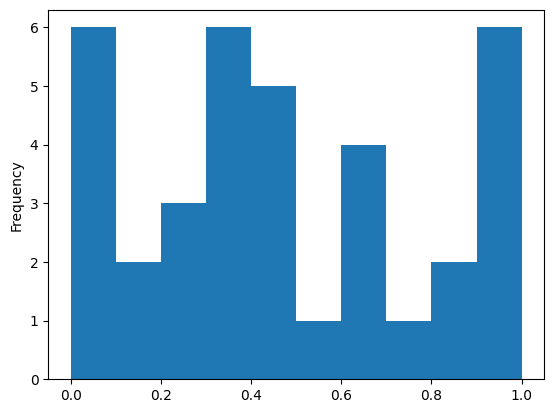

In [173]:
df_metrics_routes[df_metrics_routes.metric == "score_penalty"]["value"].astype("float32").plot.hist()